# Model Calibration using History Matching: A Basic Example


Calibration of simple SIR model using history matching. 


### Requirements

In addition to a set of basic python libraries, in this example we use the following components of phyloModels:

- **`phylomodels.models.sir_taoLeap_getIncidence`**: This is a basic SIR model that returns simulated incidence as time series. 

- **`phylomodels.calibration.init_historyMatching_poissonGlmBasis`**: This function runs a sequence of history matching iterations using a simplified configuration. This configuration uses a Poisson GLM basis for the history matching emulator (see [history_matching](https://github.com/InstituteforDiseaseModeling/history_matching) documentation for details on the configuration of history matching).

- **`phylomodels.calibration.cal_parameterSweep`**: This function computes a distance (i.e., error) metric for the model output (using a given set of input parameters) compared to some measurements or observations.


In [1]:
# Python libraries
import numpy
import pandas
import warnings
import matplotlib
from matplotlib import pyplot as plt
plt.rcParams['figure.dpi'] = 250   # Improve the quality of figures in the notebook

# PhyloModels
from phylomodels.models.sir_taoLeap_getIncidence                    \
     import sir_taoLeap_getIncidence
from phylomodels.calibration.init_historyMatching_poissonGlmBasis   \
     import init_historyMatching_poissonGlmBasis
from phylomodels.calibration.cal_parameterSweep                     \
     import cal_parameterSweep

Looks like you don't have CUDA, that's okay, we'll try using CPU but it will be SLOW!


### Configuration parameters

We define a basic set of parameters for our example. These parameters define the ground truth (i.e., set of parameters that we expect to recover after calibration) and calibration processes.

In [2]:
# Model parameters (for generation of observations)
# This is the solution that we expect to recover after calibration
xref_name = [ "beta", "gamma",  "s0", "i0", "r0", "nDays" ]
xref_val  = [    2.2,     1.0,  9995,    5,    0,     20  ]

# Model parameters (for calibration)
# These are lower and upper bounds for each of the model parameters;
# they are used as input for history matching
x_name = [ "beta", "gamma",  "s0", "i0", "r0", "nDays" ]
x_min  = [   1e-3,    1e-3,  9995,    5,    0,      20 ]
x_max  = [      5,       5,  9995,    5,    0,      20 ]

# History Matching (HM) configuration
hmParams = { "model_discrepancy"      : 2,     # standard dev. metric
             "observation_uncertainty": 2,     # ditto
             "max_rejection_rate"     : 99,    # exit condition (percentage)
             "max_iter"               : 4,    # exit condition (# of HM waves)
             "n_candidates"           : 200,   # grid size (number of parameter sets)
            }

# Parameter sweep configuration
calParams = { "trials"      : 10,      # number of runs for each parameter set
              "cost_metric" : "L1"     # available metrics: "L1", "L2", "Linf"
             }
             
# Other parameters
jobId = "calibration_historyMatching_sir_results"  
seed  = 1000      # for random number generators

### Initialization

In [3]:
numpy.random.seed(seed)

### Generate observations/measurements

Here we generate the observations or measurements. In this case we simulate data using our model, but we could also load data from files, if already available. 

xref = 
    beta  gamma      s0   i0   r0  nDays
0   2.2    1.0  9995.0  5.0  0.0   20.0 



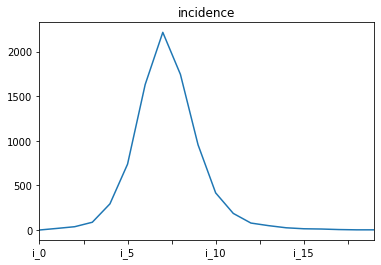

In [4]:
# Our model requires a pandas dataframe as its only input
xref = pandas.DataFrame( columns=xref_name )
xref.loc[0] = xref_val
print("xref = \n", xref, "\n")

# This is the call to our model
yref = sir_taoLeap_getIncidence( xref )

# The model returns a dataframe the incidence measurements
yref.transpose().plot( title="incidence", legend=False )


### Calibration initialization

Input arguments are formatted and passed to our history matching function. The calibration initialization function returns a set of non-unfeasable sets of parameters.

...History matching iteration  0  (max_iter =  4 )


/home/rnunez/work/phyloModels/dev/phyloModels-v0001--calibrationExampleReview/phyloModels/phylomodels/features/series/series_sum_log10.py:12: RuntimeWarning: divide by zero encountered in log10
  sum_df = pandas.DataFrame( {"sumLog10_x": numpy.log10(sum)} )


Welcome to IDM History Matching!
Found 200 unique parameter configurations, each of which is repeated 1 time(s).
--> Training with 150 unique parameter configurations ( 150  simulations including replicates)
--> Testing  with 50  unique parameter configurations ( 50 simulations including replicates)
Using Poisson family
Fitting the GLM
Fitting the model, please wait ...
...History matching iteration  0  (max_iter =  4)


/home/rnunez@internal.idm.ctr/anaconda3/envs/phyloModelsV0001/lib/python3.6/site-packages/statsmodels/genmod/families/links.py:477: RuntimeWarning: overflow encountered in exp
  return np.exp(z)
/home/rnunez@internal.idm.ctr/anaconda3/envs/phyloModelsV0001/lib/python3.6/site-packages/statsmodels/genmod/families/family.py:426: RuntimeWarning: divide by zero encountered in true_divide
  endog_mu = self._clean(endog / mu)
/home/rnunez@internal.idm.ctr/anaconda3/envs/phyloModelsV0001/lib/python3.6/site-packages/statsmodels/genmod/families/family.py:426: RuntimeWarning: invalid value encountered in true_divide
  endog_mu = self._clean(endog / mu)
/home/rnunez@internal.idm.ctr/anaconda3/envs/phyloModelsV0001/lib/python3.6/site-packages/statsmodels/genmod/families/family.py:131: RuntimeWarning: invalid value encountered in multiply
  return 1. / (self.link.deriv(mu)**2 * self.variance(mu))
/home/rnunez@internal.idm.ctr/anaconda3/envs/phyloModelsV0001/lib/python3.6/site-packages/statsmodels/ge

Welcome to IDM History Matching!
Found 200 unique parameter configurations, each of which is repeated 1 time(s).
--> Training with 150 unique parameter configurations ( 150  simulations including replicates)
--> Testing  with 50  unique parameter configurations ( 50 simulations including replicates)
Using Poisson family
Fitting the GLM
Fitting the model, please wait ...
                 Generalized Linear Model Regression Results                  
Dep. Variable:             Sim_Result   No. Observations:                  150
Model:                            GLM   Df Residuals:                      147
Model Family:                 Poisson   Df Model:                            2
Link Function:                    log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:            -1.2770e+05
Date:                Thu, 31 Oct 2019   Deviance:                   2.5448e+05
Time:                        17:13:33   Pearson chi2:                 2.10

/home/rnunez@internal.idm.ctr/anaconda3/envs/phyloModelsV0001/lib/python3.6/site-packages/scipy/optimize/_minimize.py:517: RuntimeWarning: Method CG cannot handle constraints nor bounds.
  RuntimeWarning)



	LL: 55.51828314444704 
	Theta: [2.  0.1 0.1 0.1] 
	Deriv: [-14.15402178   9.94306455  14.69361016  23.74428632]

	LL: 55.51828314444704 
	Theta: [2.  0.1 0.1 0.1] 
	Deriv: [-14.15402178   9.94306455  14.69361016  23.74428632]

	LL: 40.33458920712452 
	Theta: [3.09061516 0.07365781 0.0636472  0.04818537] 
	Deriv: [-4.26419864  0.14361239  5.95380286  9.60644306]

	LL: 55.02530398102439 
	Theta: [7.57285904e+00 7.14678296e-02 1.82114979e-02 6.39862507e-03] 
	Deriv: [ 15.59279107  36.54096321 -12.07148486 -40.99787803]

	LL: 28.78065235999334 
	Theta: [4.4701427  0.07274798 0.03801863 0.02098178] 
	Deriv: [ 1.19255841 20.72960921  0.9389705  -3.31677968]

	LL: 92.61246775812673 
	Theta: [1.03107159e+01 1.77996738e-02 9.95603239e-03 3.32907924e-03] 
	Deriv: [ 50.89036604  12.25107187 -69.50144558 -80.69115216]

	LL: 24.65716338538195 
	Theta: [5.48254624 0.05157913 0.0274066  0.01338279] 
	Deriv: [ 0.77889071 19.1602657  13.7886417  -8.99732932]

	LL: 21.017923254693017 
	Theta: [6.16758


	LL: -17.752693424570083 
	Theta: [0.6954279  0.00599306 0.00714345 0.00537116] 
	Deriv: [ 0.00968704  0.02508881 -0.0019595   0.03900324]

	LL: -17.75272030878361 
	Theta: [0.69542791 0.00599306 0.00714345 0.00537116] 
	Deriv: [ 0.00974528  0.02510646 -0.00206503  0.03891096]

	LL: -17.75269165963917 
	Theta: [0.69542791 0.00599306 0.00714345 0.00537116] 
	Deriv: [ 0.00968495  0.02508674 -0.00196078  0.03902325]

	LL: -17.75272030878361 
	Theta: [0.69542791 0.00599306 0.00714345 0.00537116] 
	Deriv: [ 0.00974528  0.02510646 -0.00206503  0.03891096]

	LL: -17.75269727901238 
	Theta: [0.69542791 0.00599306 0.00714345 0.00537116] 
	Deriv: [ 0.00973305  0.0250892  -0.00198211  0.03899307]

	LL: -17.75272030878361 
	Theta: [0.69542791 0.00599306 0.00714345 0.00537116] 
	Deriv: [ 0.00974528  0.02510646 -0.00206503  0.03891096]

	LL: -17.75272030878361 
	Theta: [0.69542791 0.00599306 0.00714345 0.00537116] 
	Deriv: [ 0.00974528  0.02510646 -0.00206503  0.03891096]

	LL: -17.75272021226533 



	LL: -17.75253905343311 
	Theta: [0.6954127  0.00599272 0.00714349 0.00537068] 
	Deriv: [0.01201136 0.02494058 0.00085725 0.02831017]

	LL: -17.75259726347568 
	Theta: [0.69541648 0.00599281 0.00714348 0.0053708 ] 
	Deriv: [ 0.01162041  0.02519362 -0.00014284  0.03056391]

	LL: -17.75265038266636 
	Theta: [0.69541837 0.00599285 0.00714347 0.00537086] 
	Deriv: [ 0.01124281  0.02488876 -0.00030611  0.03223495]

	LL: -17.752554602772676 
	Theta: [0.69541932 0.00599287 0.00714347 0.00537089] 
	Deriv: [ 0.01111096  0.02496136 -0.0004715   0.03284393]
OPTIMIZATION RETURNED:
      fun: -17.752657767617308
     jac: array([ 0.00965586,  0.02504842, -0.00197574,  0.03901836])
 message: 'Desired error not necessarily achieved due to precision loss.'
    nfev: 121
     nit: 17
    njev: 110
  status: 2
 success: False
       x: array([-0.36322787, -5.11715239, -4.94155896, -5.22671136])
GPR evaluating training data
GPR evaluating test data
Plotting
Reading iteration 0 . cut history_matching_cut


/home/rnunez@internal.idm.ctr/anaconda3/envs/phyloModelsV0001/lib/python3.6/site-packages/scipy/optimize/_minimize.py:517: RuntimeWarning: Method CG cannot handle constraints nor bounds.
  RuntimeWarning)



	LL: 237.6770877717364 
	Theta: [2.  0.1 0.1 0.1] 
	Deriv: [ -32.1181965  -159.91910196   85.11362655   10.69364732]

	LL: 237.6770877717364 
	Theta: [2.  0.1 0.1 0.1] 
	Deriv: [ -32.1181965  -159.91910196   85.11362655   10.69364732]

	LL: 142.64418823468333 
	Theta: [2.38492251 0.24022724 0.06272226 0.09430791] 
	Deriv: [-10.17022647 -20.99631852  20.52163519   4.08693377]

	LL: 355.10585515615804 
	Theta: [1.74101525e+01 1.45530444e+01 1.13601725e-03 4.24245508e-02] 
	Deriv: [ 4.956848   68.35285674 -4.93991814 -2.1686977 ]

	LL: 136.7299380959385 
	Theta: [3.21197104 0.44417609 0.03439724 0.08367383] 
	Deriv: [-4.07307319 25.78486796  5.84343355  1.91678488]

	LL: 126.51566364641819 
	Theta: [5.85883235 0.40360045 0.01122329 0.06500345] 
	Deriv: [-4.04189068 33.67644454  2.04159343  4.35467947]

	LL: 261.0205316359312 
	Theta: [6.48587943e+01 2.75129716e-01 1.27205480e-04 2.36768264e-02] 
	Deriv: [ 44.16770762   9.62203281 -57.7007854  -35.68005623]

	LL: 123.5488051854206 
	Theta


	LL: 107.753246700217 
	Theta: [6.59979060e+01 1.92334258e-01 1.08290244e-02 9.30996898e-02] 
	Deriv: [ 0.04514439 -0.08162015 -0.03729845 -0.0190323 ]

	LL: 107.753246700217 
	Theta: [6.59979060e+01 1.92334258e-01 1.08290244e-02 9.30996898e-02] 
	Deriv: [ 0.04514439 -0.08162015 -0.03729845 -0.0190323 ]

	LL: 107.753246700217 
	Theta: [6.59979060e+01 1.92334258e-01 1.08290244e-02 9.30996898e-02] 
	Deriv: [ 0.04514439 -0.08162015 -0.03729845 -0.0190323 ]

	LL: 107.7532535137321 
	Theta: [6.59979060e+01 1.92334258e-01 1.08290244e-02 9.30996898e-02] 
	Deriv: [ 0.04625387 -0.08163319 -0.0382827  -0.019217  ]

	LL: 107.753246700217 
	Theta: [6.59979060e+01 1.92334258e-01 1.08290244e-02 9.30996898e-02] 
	Deriv: [ 0.04514439 -0.08162015 -0.03729845 -0.0190323 ]

	LL: 107.753246700217 
	Theta: [6.59979060e+01 1.92334258e-01 1.08290244e-02 9.30996898e-02] 
	Deriv: [ 0.04514439 -0.08162015 -0.03729845 -0.0190323 ]

	LL: 107.75325439432966 
	Theta: [6.59979060e+01 1.92334258e-01 1.08290244e-02 9


	LL: 107.75274866533348 
	Theta: [6.60148934e+01 1.92725424e-01 1.08396117e-02 9.27352136e-02] 
	Deriv: [ 0.05514125  0.06123221 -0.03699724 -0.04308618]

	LL: 107.75274866533348 
	Theta: [6.60148934e+01 1.92725424e-01 1.08396117e-02 9.27352136e-02] 
	Deriv: [ 0.05514125  0.06123221 -0.03699724 -0.04308618]

	LL: 107.75274866533348 
	Theta: [6.60148934e+01 1.92725424e-01 1.08396117e-02 9.27352136e-02] 
	Deriv: [ 0.05514125  0.06123221 -0.03699724 -0.04308618]
OPTIMIZATION RETURNED:
      fun: 107.75441780343368
     jac: array([ 0.04592045, -0.08793865, -0.03553405, -0.01844749])
 message: 'Desired error not necessarily achieved due to precision loss.'
    nfev: 110
     nit: 17
    njev: 100
  status: 2
 success: False
       x: array([ 4.18961832, -1.64855754, -4.52554313, -2.37401289])
GPR evaluating training data
GPR evaluating test data
Plotting
Reading iteration 1 . cut history_matching_cut
Welcome to IDM History Matching!
Found 200 unique parameter configurations, each of which

/home/rnunez/work/historyMatching/history_matching/history_matching/HistoryMatchingCut.py:80: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  plausible_candidates['Yglm'] = self.glm_all[cut].evaluate(plausible_candidates)
/home/rnunez/work/historyMatching/history_matching/history_matching/HistoryMatchingCut.py:86: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  plausible_candidates['Mean_Estimate'] = plausible_candidates['Yglm'] + ret['Mean']
/home/rnunez/work/historyMatching/history_matching/history_matching/HistoryMatchingCut.py:87: SettingWi

Test plausibility: 1.815169334411621
Merge plausibility (needed?): 0.0013668537139892578
Plausible candidates: New = 3 , Tot = 3
--------------------------------------------------------------------------------
LHS Sampling ( 12312 ): 0.011119365692138672
LHS Scaling: 0.0013642311096191406
DataFrame: 0.0005731582641601562
Constraint: 7.152557373046875e-07
(12312, 3)
Performing cut: iteration 1 , cut history_matching_cut
(8587, 3)
Performing cut: iteration 0 , cut history_matching_cut
Test plausibility: 1026.1364772319794
Merge plausibility (needed?): 0.002938985824584961
Plausible candidates: New = 211 , Tot = 214
Saving to: Candidates_for_iter2.hd5
Rejected 98.3% [12298 / 12512]
...History matching iteration  2  (max_iter =  4)
Welcome to IDM History Matching!
Found 214 unique parameter configurations, each of which is repeated 1 time(s).
--> Training with 160 unique parameter configurations ( 160  simulations including replicates)
--> Testing  with 54  unique parameter configurations 

/home/rnunez@internal.idm.ctr/anaconda3/envs/phyloModelsV0001/lib/python3.6/site-packages/statsmodels/genmod/families/links.py:477: RuntimeWarning: overflow encountered in exp
  return np.exp(z)
/home/rnunez@internal.idm.ctr/anaconda3/envs/phyloModelsV0001/lib/python3.6/site-packages/statsmodels/genmod/families/family.py:426: RuntimeWarning: divide by zero encountered in true_divide
  endog_mu = self._clean(endog / mu)
/home/rnunez@internal.idm.ctr/anaconda3/envs/phyloModelsV0001/lib/python3.6/site-packages/statsmodels/genmod/families/family.py:426: RuntimeWarning: invalid value encountered in true_divide
  endog_mu = self._clean(endog / mu)
/home/rnunez@internal.idm.ctr/anaconda3/envs/phyloModelsV0001/lib/python3.6/site-packages/statsmodels/genmod/families/family.py:131: RuntimeWarning: invalid value encountered in multiply
  return 1. / (self.link.deriv(mu)**2 * self.variance(mu))
/home/rnunez@internal.idm.ctr/anaconda3/envs/phyloModelsV0001/lib/python3.6/site-packages/statsmodels/ge

Welcome to IDM History Matching!
Found 214 unique parameter configurations, each of which is repeated 1 time(s).
--> Training with 160 unique parameter configurations ( 160  simulations including replicates)
--> Testing  with 54  unique parameter configurations ( 54 simulations including replicates)
Using Poisson family
Fitting the GLM
Fitting the model, please wait ...
...History matching iteration  2  (max_iter =  4)


/home/rnunez/work/phyloModels/dev/phyloModels-v0001--calibrationExampleReview/phyloModels/phylomodels/calibration/init_historyMatching/historyMatchingIteration.py:140: UserWarning: An exception occurred during the execution of history matching operations. Calibration process aborted:
On entry to DLASCL parameter number 4 had an illegal value
  str(e)


Welcome to IDM History Matching!
Found 214 unique parameter configurations, each of which is repeated 1 time(s).
--> Training with 160 unique parameter configurations ( 160  simulations including replicates)
--> Testing  with 54  unique parameter configurations ( 54 simulations including replicates)
Using Poisson family
Fitting the GLM
Fitting the model, please wait ...
                 Generalized Linear Model Regression Results                  
Dep. Variable:             Sim_Result   No. Observations:                  160
Model:                            GLM   Df Residuals:                      157
Model Family:                 Poisson   Df Model:                            2
Link Function:                    log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                   -inf
Date:                Thu, 31 Oct 2019   Deviance:                   8.7287e+05
Time:                        17:34:08   Pearson chi2:                 1.42

/home/rnunez@internal.idm.ctr/anaconda3/envs/phyloModelsV0001/lib/python3.6/site-packages/scipy/optimize/_minimize.py:517: RuntimeWarning: Method CG cannot handle constraints nor bounds.
  RuntimeWarning)



	LL: 755.4210521612863 
	Theta: [2.  0.1 0.1 0.1] 
	Deriv: [ -16.68227794 -692.77981507   18.50198944   22.58277478]

	LL: 755.4210521612863 
	Theta: [2.  0.1 0.1 0.1] 
	Deriv: [ -16.68227794 -692.77981507   18.50198944   22.58277478]

	LL: 338.6072269724957 
	Theta: [2.04917974 0.27423425 0.09734175 0.09676502] 
	Deriv: [  -3.19429079 -209.11027168    4.86212738    4.98099082]

	LL: 371.52819826973985 
	Theta: [ 2.17899368 15.29070088  0.0886533   0.08792685] 
	Deriv: [ 0.36480385 74.3656989  -0.13057895 -0.12283114]

	LL: 231.1021949134691 
	Theta: [2.0958154  1.19645715 0.09406399 0.09342842] 
	Deriv: [ 0.39281698 12.05340958  0.16253545  0.08839972]

	LL: 371.52819826973985 
	Theta: [ 2.17899368 15.29070088  0.0886533   0.08792685] 
	Deriv: [ 0.36480385 74.3656989  -0.13057895 -0.12283114]

	LL: 242.84304240657355 
	Theta: [2.1106495  1.8985356  0.09305955 0.09240651] 
	Deriv: [ 0.51812613 36.9071763  -0.08304659 -0.12319691]

	LL: 230.4904932916602 
	Theta: [2.09384818 1.12511941


	LL: 216.50922487352443 
	Theta: [5.97447072e+04 7.69714498e-01 3.12721843e-01 6.53534059e-02] 
	Deriv: [-1.67946564  0.44619025  0.29381722  0.46710394]

	LL: 213.29195882180952 
	Theta: [8.05509372e+01 6.96461902e-01 1.70299106e-02 8.56052507e-03] 
	Deriv: [ 0.56527778 -6.3222623   0.25133212 -2.30991611]

	LL: 213.25338354658777 
	Theta: [1.46917290e+02 7.02824434e-01 2.21895465e-02 1.02985077e-02] 
	Deriv: [ 0.74720034 -5.49579074  0.22900341 -2.51519875]

	LL: 213.13587858660688 
	Theta: [1.46518063e+02 7.17032355e-01 2.21710491e-02 1.03932704e-02] 
	Deriv: [ 0.71690023 -3.81613977  0.25679007 -2.4669057 ]

	LL: 212.99346823656305 
	Theta: [1.44931976e+02 7.76794890e-01 2.20972138e-02 1.07811214e-02] 
	Deriv: [ 0.59400579  2.58420127  0.36833437 -2.2731239 ]

	LL: 212.6126021767557 
	Theta: [1.35691345e+02 7.98446595e-01 2.13919447e-02 1.37021249e-02] 
	Deriv: [ 0.1185388   4.91010533  0.6710922  -1.38021516]

	LL: 212.53996042065103 
	Theta: [1.29125222e+02 8.15144745e-01 2.0875


	LL: 211.9790596165952 
	Theta: [1.60786258e+02 7.49609013e-01 1.59453557e-02 2.65556775e-02] 
	Deriv: [-0.01398348  0.05658007 -0.0422056   0.00021004]

	LL: 211.9790596165952 
	Theta: [1.60786258e+02 7.49609013e-01 1.59453557e-02 2.65556775e-02] 
	Deriv: [-0.01398348  0.05658007 -0.0422056   0.00021004]

	LL: 211.9790596165952 
	Theta: [1.60786258e+02 7.49609013e-01 1.59453557e-02 2.65556775e-02] 
	Deriv: [-0.01398348  0.05658007 -0.0422056   0.00021004]

	LL: 211.9790596165952 
	Theta: [1.60786258e+02 7.49609013e-01 1.59453557e-02 2.65556775e-02] 
	Deriv: [-0.01398348  0.05658007 -0.0422056   0.00021004]

	LL: 211.97908183797097 
	Theta: [1.60786258e+02 7.49609013e-01 1.59453557e-02 2.65556775e-02] 
	Deriv: [-0.01397289  0.05653289 -0.04242904  0.0001618 ]

	LL: 211.9790596165952 
	Theta: [1.60786258e+02 7.49609013e-01 1.59453557e-02 2.65556775e-02] 
	Deriv: [-0.01398348  0.05658007 -0.0422056   0.00021004]

	LL: 211.9790596165952 
	Theta: [1.60786258e+02 7.49609013e-01 1.59453557e

Reading iteration 0 . cut history_matching_cut
Welcome to IDM History Matching!
Found 200 unique parameter configurations, each of which is repeated 1 time(s).
--> Training with 150 unique parameter configurations ( 150  simulations including replicates)
--> Testing  with 50  unique parameter configurations ( 50 simulations including replicates)
	 Desired Result: 8505
	 Desired Result Var: 0
	 Discrepancy Var: 4
	 Imp Thresh: 3
Using Poisson family
                 Generalized Linear Model Regression Results                  
Dep. Variable:             Sim_Result   No. Observations:                  150
Model:                            GLM   Df Residuals:                      147
Model Family:                 Poisson   Df Model:                            2
Link Function:                    log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:            -1.2770e+05
Date:                Thu, 31 Oct 2019   Deviance:                   2.544

/home/rnunez/work/historyMatching/history_matching/history_matching/HistoryMatchingCut.py:80: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  plausible_candidates['Yglm'] = self.glm_all[cut].evaluate(plausible_candidates)
/home/rnunez/work/historyMatching/history_matching/history_matching/HistoryMatchingCut.py:86: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  plausible_candidates['Mean_Estimate'] = plausible_candidates['Yglm'] + ret['Mean']
/home/rnunez/work/historyMatching/history_matching/history_matching/HistoryMatchingCut.py:87: SettingWi

(79, 3)
Performing cut: iteration 0 , cut history_matching_cut
Test plausibility: 3.409025192260742
Merge plausibility (needed?): 0.001226663589477539
Plausible candidates: New = 2 , Tot = 2
--------------------------------------------------------------------------------
LHS Sampling ( 16500 ): 0.011701583862304688
LHS Scaling: 0.0017666816711425781
DataFrame: 0.0009627342224121094
Constraint: 4.76837158203125e-07
(16500, 3)
Performing cut: iteration 2 , cut history_matching_cut
(11575, 3)
Performing cut: iteration 1 , cut history_matching_cut
(6747, 3)
Performing cut: iteration 0 , cut history_matching_cut
Test plausibility: 1889.0164821147919
Merge plausibility (needed?): 0.0020017623901367188
Plausible candidates: New = 293 , Tot = 295
Saving to: Candidates_for_iter3.hd5
Rejected 98.2% [16405 / 16700]
...History matching iteration  3  (max_iter =  4)
Welcome to IDM History Matching!
Found 295 unique parameter configurations, each of which is repeated 1 time(s).
--> Training with 221

/home/rnunez@internal.idm.ctr/anaconda3/envs/phyloModelsV0001/lib/python3.6/site-packages/scipy/optimize/_minimize.py:517: RuntimeWarning: Method CG cannot handle constraints nor bounds.
  RuntimeWarning)



	LL: 1046.0542510116293 
	Theta: [2.  0.1 0.1 0.1] 
	Deriv: [-1.13634519e+01 -9.72426865e+02  3.18952159e-01  2.42550480e+01]

	LL: 1046.0542510116293 
	Theta: [2.  0.1 0.1 0.1] 
	Deriv: [-1.13634519e+01 -9.72426865e+02  3.18952159e-01  2.42550480e+01]

	LL: 465.0423982237038 
	Theta: [2.02373583 0.27445497 0.09996689 0.09751318] 
	Deriv: [  -2.3642538  -289.22118334   -0.8397163     6.30601684]

	LL: 516.4451308764299 
	Theta: [ 2.09195464 15.84326793  0.10115098  0.0892605 ] 
	Deriv: [  0.36143781 103.13118085  -0.12538173  -0.117692  ]

	LL: 317.8153620866058 
	Theta: [2.04825216 1.19732659 0.10039535 0.09443103] 
	Deriv: [ 0.28233953 17.56433625 -0.46543509  0.48694022]

	LL: 516.4451308764299 
	Theta: [ 2.09195464 15.84326793  0.10115098  0.0892605 ] 
	Deriv: [  0.36143781 103.13118085  -0.12538173  -0.117692  ]

	LL: 334.8134597569571 
	Theta: [2.05613187 1.91515742 0.10053235 0.09346887] 
	Deriv: [ 0.40499164 52.14044442 -0.34983254  0.12491482]

	LL: 316.8559717056527 
	Theta:


	LL: 313.56203696242414 
	Theta: [6.93669558e-02 9.37910863e-01 9.08142420e+04 7.45244240e-10] 
	Deriv: [ 3.46334331e-02  7.78772415e-01 -3.97107903e-10  1.59541728e-03]

	LL: 313.84838833563924 
	Theta: [2.01588241e-01 8.78150583e-01 9.08142435e+04 8.84171340e-10] 
	Deriv: [ 1.48695007e+00  6.63145672e+00 -1.19775729e-09  3.77334164e-02]

	LL: 313.5611742612914 
	Theta: [8.41683470e-02 9.26782620e-01 9.08142422e+04 7.68701196e-10] 
	Deriv: [ 7.70098839e-02  1.13382530e+00 -4.81829675e-10  4.77782487e-03]

	LL: 313.5610136529918 
	Theta: [7.83248713e-02 9.30907155e-01 9.08142421e+04 7.59889475e-10] 
	Deriv: [ 5.66412362e-02  9.68678861e-01 -4.48431431e-10  3.45342916e-03]

	LL: 313.5590726071203 
	Theta: [8.03265243e-02 9.27539728e-01 9.08142422e+04 7.62977367e-10] 
	Deriv: [ 4.66213902e-02  8.30151201e-01 -4.61164396e-10  3.94081178e-03]

	LL: 313.5534663563849 
	Theta: [8.88579149e-02 9.14191392e-01 9.08142423e+04 7.75454927e-10] 
	Deriv: [ 6.48983598e-03  3.42607894e-01 -5.15402511


	LL: 313.5224151307008 
	Theta: [2.63636044e-01 7.37261064e-01 9.08142453e+04 6.29430314e-10] 
	Deriv: [-2.83236551e-03  2.04932359e-02 -1.77548103e-09 -7.65890306e-03]

	LL: 313.5224151307008 
	Theta: [2.63636044e-01 7.37261064e-01 9.08142453e+04 6.29430314e-10] 
	Deriv: [-2.83236551e-03  2.04932359e-02 -1.77548103e-09 -7.65890306e-03]

	LL: 313.5224151469492 
	Theta: [2.63636045e-01 7.37261062e-01 9.08142453e+04 6.29430310e-10] 
	Deriv: [-2.83238943e-03  2.04932079e-02 -1.77548125e-09 -7.65890031e-03]

	LL: 313.5224151307008 
	Theta: [2.63636044e-01 7.37261064e-01 9.08142453e+04 6.29430314e-10] 
	Deriv: [-2.83236551e-03  2.04932359e-02 -1.77548103e-09 -7.65890306e-03]

	LL: 313.5224151307008 
	Theta: [2.63636044e-01 7.37261064e-01 9.08142453e+04 6.29430314e-10] 
	Deriv: [-2.83236551e-03  2.04932359e-02 -1.77548103e-09 -7.65890306e-03]

	LL: 313.52241515745726 
	Theta: [2.63636045e-01 7.37261063e-01 9.08142453e+04 6.29430312e-10] 
	Deriv: [-2.83239691e-03  2.04931923e-02 -1.77548103e

GPR evaluating training data
GPR evaluating test data
Plotting
Reading iteration 3 . cut history_matching_cut
Welcome to IDM History Matching!
Found 295 unique parameter configurations, each of which is repeated 1 time(s).
--> Training with 221 unique parameter configurations ( 221  simulations including replicates)
--> Testing  with 74  unique parameter configurations ( 74 simulations including replicates)
	 Desired Result: 1630
	 Desired Result Var: 0
	 Discrepancy Var: 4
	 Imp Thresh: 3
Using Poisson family
                 Generalized Linear Model Regression Results                  
Dep. Variable:             Sim_Result   No. Observations:                  221
Model:                            GLM   Df Residuals:                      218
Model Family:                 Poisson   Df Model:                            2
Link Function:                    log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -30652.
Date:     

/home/rnunez/work/historyMatching/history_matching/history_matching/HistoryMatchingCut.py:80: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  plausible_candidates['Yglm'] = self.glm_all[cut].evaluate(plausible_candidates)
/home/rnunez/work/historyMatching/history_matching/history_matching/HistoryMatchingCut.py:86: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  plausible_candidates['Mean_Estimate'] = plausible_candidates['Yglm'] + ret['Mean']
/home/rnunez/work/historyMatching/history_matching/history_matching/HistoryMatchingCut.py:87: SettingWi

(62, 3)
Performing cut: iteration 1 , cut history_matching_cut
(54, 3)
Performing cut: iteration 0 , cut history_matching_cut
Test plausibility: 5.510789632797241
Merge plausibility (needed?): 0.001222372055053711
Plausible candidates: New = 6 , Tot = 6
--------------------------------------------------------------------------------
LHS Sampling ( 6929 ): 0.005559206008911133
LHS Scaling: 0.0013239383697509766
DataFrame: 0.0009675025939941406
Constraint: 7.152557373046875e-07
(6929, 3)
Performing cut: iteration 3 , cut history_matching_cut
(2082, 3)
Performing cut: iteration 2 , cut history_matching_cut
(1999, 3)
Performing cut: iteration 1 , cut history_matching_cut
(1502, 3)
Performing cut: iteration 0 , cut history_matching_cut
Test plausibility: 285.6434051990509
Merge plausibility (needed?): 0.0020895004272460938
Plausible candidates: New = 111 , Tot = 117
--------------------------------------------------------------------------------
LHS Sampling ( 6444 ): 0.004807233810424805
L

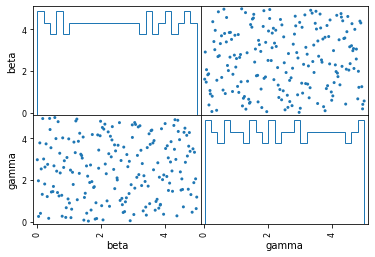

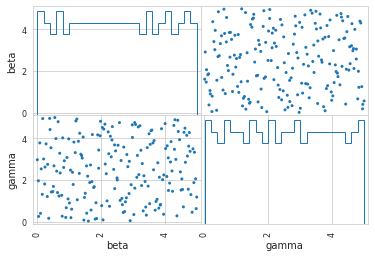

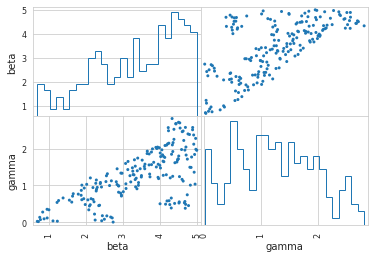

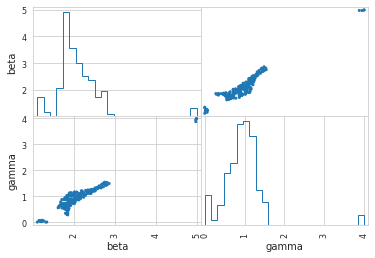

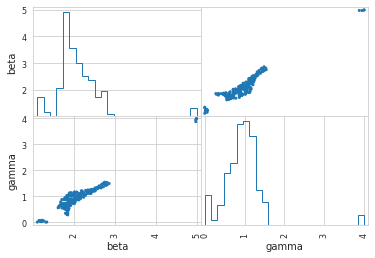

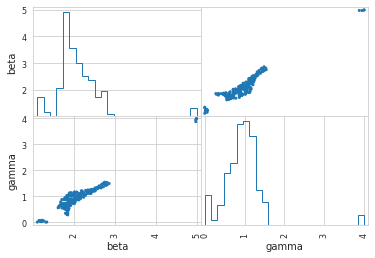

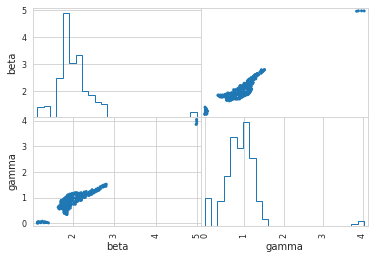

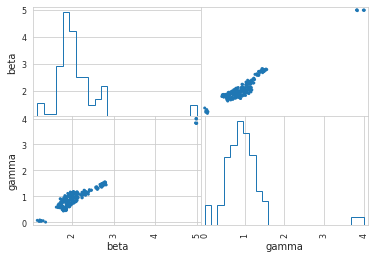

In [5]:
xInfo = pandas.DataFrame( {  'Name': x_name,
                             'Min' : x_min,
                             'Max' : x_max
                          } ).set_index('Name')
                          
xInit = init_historyMatching_poissonGlmBasis( xInfo,
                                              yref, 
                                              sir_taoLeap_getIncidence,
                                              jobId,
                                              hmParams
                                             )

print( xInit.head() )  # Quickly check how the output looks like

The call to our history matching initializer generates a directory containing history matching partial/diagnostic data. The name of the directory is given by the `jobId` parameter defined above, followed by a timestamp. The initializer also changes the current directory to main subdirectory in the newly created tree structure.

In [6]:
!pwd

!ls -R ..

/home/rnunez@internal.idm.ctr/anaconda3/envs/phyloModelsV0001/lib/python3.6/site-packages/calibration_historyMatching_sir_results--20191031-171322/main
..:
iter0  iter1  iter2  iter3  main

../iter0:
Cuts

../iter0/Cuts:
history_matching_cut

../iter0/Cuts/history_matching_cut:
GLM  GPR  history_matching_config.xlsx	Implausibility

../iter0/Cuts/history_matching_cut/GLM:
 deviance_redisuals.pdf  'GLM Predicted vs Actual.pdf'	 params.p
 fitted_vs_observed.pdf   model.json			 pearson_residuals.pdf
'GLM expId 0.pdf'	  PairwiseResults		 QQ.pdf

../iter0/Cuts/history_matching_cut/GLM/PairwiseResults:
beta-gamma.pdf

../iter0/Cuts/history_matching_cut/GPR:
emulation.pdf  histogram.pdf  model_with_test_data.json
gpr.pdf        model.json     PairwiseResults

../iter0/Cuts/history_matching_cut/GPR/PairwiseResults:
beta-gamma.pdf

../iter0/Cuts/history_matching_cut/Implausibility:
implausibility.pdf  PairwiseResults

../iter0/Cuts/history_matching_cut/Implausibility/PairwiseResults:
Test  Train

We can retrieve, for example, a summary of the history matching progression (as saved in `history.txt`)

In [7]:
!cat history.txt

Iteration  	  Rejection  	 Selected 	 Time (s) 
           	  Rate (%)   	 Feature  	          

    1		83.4163		sum_x		103.77
    2		98.2896		diff_L1		1119.67
    3		98.2335		dx_6		2009.38
    4		98.4012		x_6		764.75


### Calibration

We can run a parameter sweep on the sets of parameters rendered by history matching to actually find the ones that better reproduce the observation data (i.e., trajectory selection).

In [8]:
xHat = cal_parameterSweep( xInfo, 
                           xInit, 
                           yref, 
                           sir_taoLeap_getIncidence, 
                           calParams )

print( xHat.head() )

          beta     gamma      s0   i0   r0  nDays   cost  trial  i_0   i_1  \
1141  2.321374  1.037618  9995.0  5.0  0.0   20.0  13.80      5  0.0  18.0   
1507  2.145809  0.952525  9995.0  5.0  0.0   20.0  22.60      6  0.0  32.0   
987   2.129666  0.924862  9995.0  5.0  0.0   20.0  23.00      4  0.0  15.0   
1898  1.900699  0.781913  9995.0  5.0  0.0   20.0  24.25      8  0.0   9.0   
2139  1.853424  0.738075  9995.0  5.0  0.0   20.0  24.60      9  0.0  17.0   

      ...   i_10   i_11   i_12  i_13  i_14  i_15  i_16  i_17  i_18  i_19  
1141  ...  415.0  185.0  114.0  49.0  26.0   7.0   4.0   1.0   1.0   0.0  
1507  ...  410.0  184.0  122.0  43.0  20.0  19.0   2.0   3.0   2.0   0.0  
987   ...  400.0  194.0   88.0  43.0  26.0   5.0   6.0   1.0   0.0   0.0  
1898  ...  485.0  245.0  115.0  59.0  35.0  21.0  10.0   8.0   4.0   1.0  
2139  ...  495.0  273.0  137.0  68.0  37.0  18.0   4.0   3.0   4.0   2.0  

[5 rows x 28 columns]


### Results: Summary

In [9]:
print( "\n" )
print( "Solution (the output of the calibration process):" )
print( "  beta  = ", "{:.2f}".format( xHat["beta" ].iloc[0] ) )
print( "  gamma = ", "{:.2f}".format( xHat["gamma"].iloc[0] ) )
print( "" )
print( "Ground truth:" )
print( "  beta  = ", "{:.2f}".format( xref["beta" ][0] ) )
print( "  gamma = ", "{:.2f}".format( xref["gamma"][0] ) )
print( "\n" )



Solution (the output of the calibration process):
  beta  =  2.32
  gamma =  1.04

Ground truth:
  beta  =  2.20
  gamma =  1.00




### Results: History matching output

History matching returns a set of candidate points to be evaluated by the calibration method. Those points are expected to significantly reduce the initial parameter space.

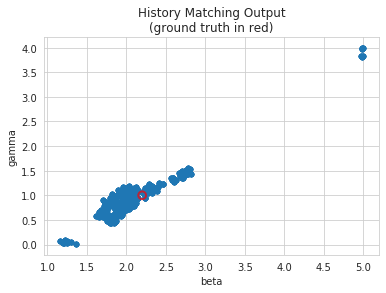

In [10]:
titleString = "History Matching Output\n(ground truth in red)"
xHat.plot.scatter( x     = "beta", 
                   y     = "gamma",
                   title = titleString,
                   grid  = True
                     )
plt.scatter( xref["beta"],          # Superimpose the actual solution
             xref["gamma"], 
             marker="o" ,
             s = 60,
             linewidths =2,
             color="r", 
             facecolors="none",
             alpha=0.7
            )

### Results: Parameter sweep output

Through parameter sweep we compute error metrics on multiple model calls with each parameter set. The results may be seen as an approximated pseudo-likelihood function on the parameter space.

In the figure below, the darker the point, the better it approximates the observation data.

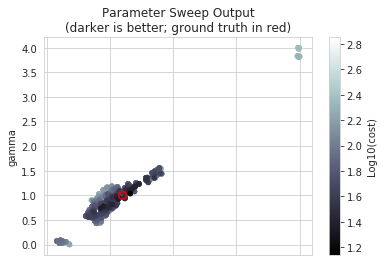

In [12]:
titleString = "Parameter Sweep Output\n(darker is better; ground truth in red)"
xHatReverseOrder = xHat.sort_values( by=["cost"], ascending=False ) # This sorts 
                # the data for the scatter plot rendering engine. With data sorted
                # in this way, dots with lower cost (i.e., better) are rendered
                # at last, ensuring that they are more visible
xHatReverseOrder.plot.scatter( x        = "beta", 
                               y        = "gamma", 
                               c        = numpy.log10( xHatReverseOrder["cost"] ), 
                               colormap = "bone",
                               title = titleString,
                               grid     = True
                              )
f = plt.gcf(); cax = f.get_axes()[1]; cax.set_ylabel("Log10(cost)")
plt.scatter( xref["beta"],          # Superimpose the actual solution
             xref["gamma"], 
             marker="o" ,
             linewidths =2,
             s = 60,
             color="r", 
             facecolors="none",
             alpha=0.8
            )

### Results: Incidence curves

We can further verify the quality of the results by checking how well the incidence obtained by the best parameter sets (and their multiple realizations) fits the observations.

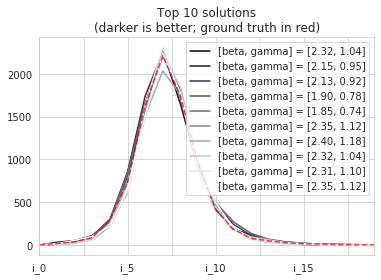

In [13]:
# Select the number of incidence curves to plot 
# and extract them from the solution dataframe
nTop = 10
lastColumn = xHat.columns[-1]
topSolutions = xHat.loc[:,"i_0":lastColumn].iloc[0:nTop].copy()

# Plot the curves
titleString = "Top " + str(nTop) \
              + " solutions\n(darker is better; ground truth in red)"
legendArray = []
for i in range(0,nTop):
    legendArray.append( "[beta, gamma] = ["                          \
                        + "{:.2f}".format( xHat["beta" ].iloc[i] )   \
                        + ", "                                       \
                        + "{:.2f}".format( xHat["gamma"].iloc[i] )   \
                        + "]"
                       )
colorScale = xHat["cost"].iloc[0:nTop].values
warnings.filterwarnings("ignore")  # Temporarily supress matplotlib warnings
                                   # generated within pandas plotting process
ax = topSolutions.transpose().plot( title    = titleString,
                                    c        = colorScale,
                                    colormap = "bone", 
                                    grid     = True
                                   )
warnings.filterwarnings("default") # Restore warnings
ax.legend(legendArray)
yref.transpose().plot( ax     = ax,       # Superimpose grount truth
                       style  = "r--",
                       alpha  = 0.8,
                       legend = False,
                       grid   = True
                      )